In [77]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.optimize import curve_fit
import math

In [78]:
# # Load the 2D array from the CSV file and the masks
load_data = np.loadtxt("data/normalized_data.csv", delimiter=",")
load_mask = np.loadtxt("data/cleaning_mask.csv", delimiter=",")
voltages = np.loadtxt("data/voltages-4K.csv", delimiter=",")
voltage_mask = np.loadtxt("data/voltage_mask.csv", delimiter=",")
 
# Reshape the 2D array back to its original 3D shape
loaded_data = load_data.reshape(312,2,144)
loaded_mask = load_mask.reshape(312,2,144)

In [79]:
# add the masks to the data
clean_data = np.ma.masked_array(loaded_data, loaded_mask)
print(len(clean_data))

clean_voltages = np.ma.masked_array(voltages, voltage_mask)
print(len(clean_voltages))

312
312


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


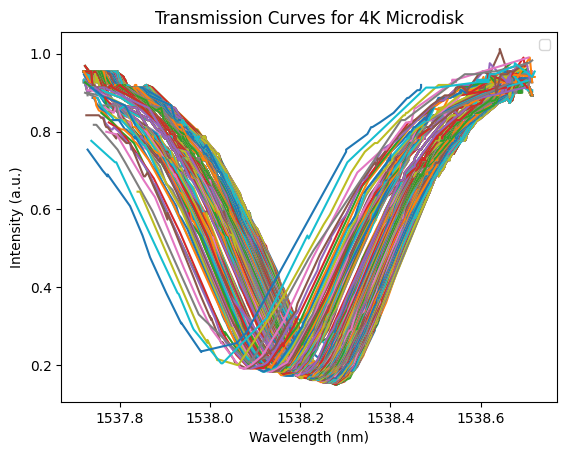

In [80]:
#lets regraph again

for i in range(len(clean_data)):
    plt.plot(clean_data[i][0], clean_data[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


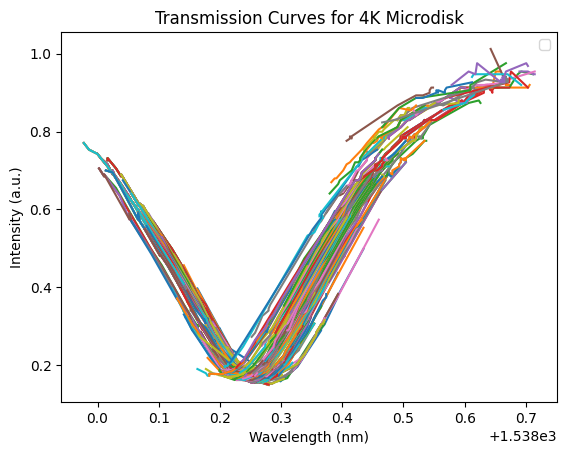

In [81]:
#lets regraph again


for i in range(len(clean_data)):
    first = 60
    last = 75
    plt.plot(clean_data[i][0][first:last], clean_data[i][1][first:last])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.savefig("figures/Gehl-4K-Curves.png")
plt.show()

In [82]:
random_number = 1735 #best for r values
radius = 1.75e-6
print(np.exp(-(random_number*2*math.pi*radius)/2))

0.9905066880262325


In [83]:
#function for transmission in an all pass ring

#function that seems to work now changing names
def Tsymthru(wavelength, neff, r, abscoef_power, radius):
    phase=4*math.pi**2*radius*neff/wavelength
    round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
    Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
    Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
    return Numer/Denom

In [84]:
#function with two inputs near 1  --> doesn't work for either
# def Tsymthru(wavelength, neff, round_trip_loss_field, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     #round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#original function --> doesn't work for alpha
# def Tsymthru(wavelength, neff, abscoef_power, r, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function that seems to work for weird names
# def Tsymthru(wavelength, neff, round_trip_loss_field, random_number, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     r=np.exp(-(random_number*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

#function with switched variables --> doesn't work for alpha
# def Tsymthru(wavelength, neff, r, abscoef_power, radius):
#     phase=4*math.pi**2*radius*neff/wavelength
#     round_trip_loss_field=np.exp(-(abscoef_power*2*math.pi*radius)/2)
#     Numer=round_trip_loss_field**2-2*round_trip_loss_field*r*np.cos(phase)+r**2
#     Denom=1-2*r*round_trip_loss_field*np.cos(phase)+(r*round_trip_loss_field)**2
#     return Numer/Denom

In [85]:
n = 2
first = 60
last = 75

def Guess(wavelength,neff, abscoef_power):
    return Tsymthru(wavelength, neff, abscoef_power, 1735, 1.75e-6) #1.75 not 10
x = np.ma.masked_array(clean_data[n][0][first:last])
y = np.ma.masked_array(clean_data[n][1][first:last])
mini = np.argmin(y)
print(mini)
print(y[mini])

9
0.15191246351049423


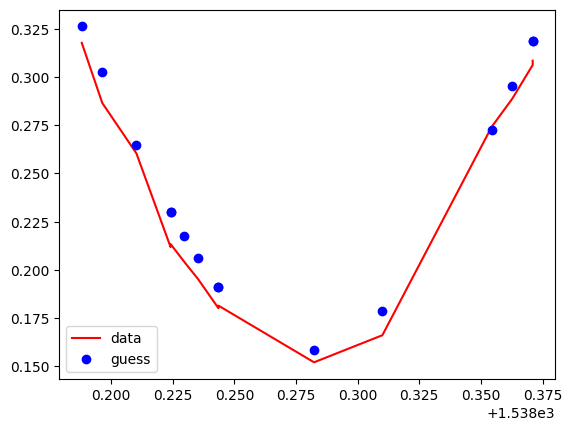

In [86]:
#276 = 2.5180, 723
#2 = 
new_x = np.linspace(1537, 1539.5, 49)
ans = Guess(x*1e-9,2.5182, 0.9959)



plt.plot(x, y, 'r-', label='data')
plt.plot(x, ans, 'o', color ='blue', label ="guess")
plt.legend()
plt.savefig("fitdata.png")
plt.show()

In [87]:
fit_params_arr=np.zeros([len(y)+1,2])
fit_params_arr[0]=[2.5182, 0.9959]
for i in range(len(y)):
    fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
    fit_params_arr[i+1]=fit_params_arr[i]
fit_params_arr=fit_params_arr[:-1]


In [88]:
fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
print(fit_params_arr[12])

[2.51819852 0.99577969]


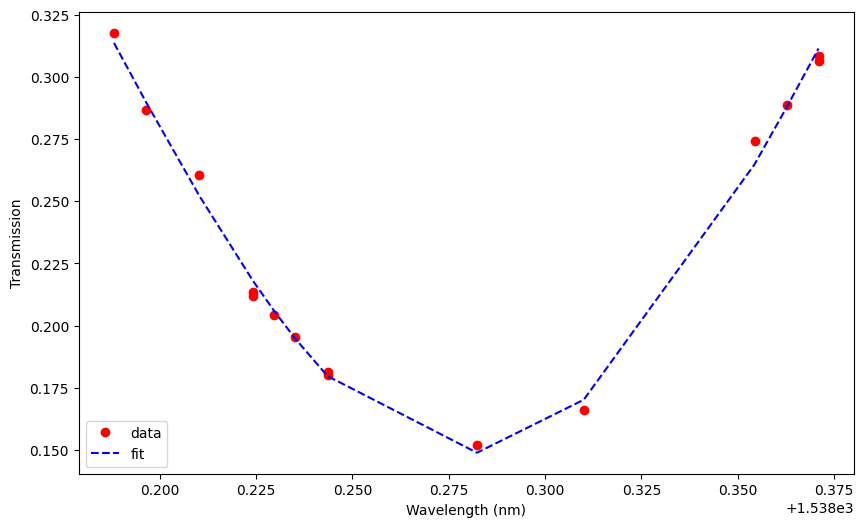

In [89]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')

plt.legend()
plt.show()

In [90]:
length = len(clean_data)
print(clean_voltages.mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False Fa

In [91]:
#print(y)
print(y[~y.mask])

[0.3177651219402189 0.2865724471020016 0.2603561048896825
 0.2117503690055565 0.21331888452528092 0.20407910209345084
 0.19523953542112818 0.18001610278401786 0.1813495505241237
 0.15191246351049423 0.16597968844602787 0.2741597295497221
 0.28869519821179124 0.3062531653036888 0.30852169897850357]


In [92]:
# so getting there for one
# now I have a general idea of where we're going
# i just need to do it like 260 more times

fits = []

def Guess(wavelength,neff):
    return Tsymthru(wavelength, neff, 0.9959, 1735, 1.75e-6)

neff = np.zeros((len(clean_voltages)))
neff_guess = 2.51819078

for n in range(0, length):
    
    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[neff_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        neff_guess = fit_params_arr[12][0]
        neff[n] = neff_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        print(len(trans))
        fits.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [2.51819078]
[2.51820044]
144
Guess is  [2.51820044]
[2.51819854]
144
Guess is  [2.51819854]
[2.51819727]
144
Guess is  [2.51819727]
[2.5181951]
144
Guess is  [2.5181951]
[2.5181932]
144
Guess is  [2.5181932]
[2.5181933]
144
Guess is  [2.5181933]
[2.51819405]
144
Guess is  [2.51819405]
[2.51819351]
144
Guess is  [2.51819351]
[2.51819279]
144
Guess is  [2.51819279]
[2.51819283]
144
Guess is  [2.51819283]
[2.51819283]
144
Guess is  [2.51819283]
[2.5181928]
144
Guess is  [2.5181928]
[2.51819294]
144
Guess is  [2.51819294]
[2.518193]
144
Guess is  [2.518193]
[2.51819136]
144
Guess is  [2.51819136]
[2.51819147]
144
Guess is  [2.51819147]
[2.51819246]
144
Guess is  [2.51819246]
[2.5181913]
144
Guess is  [2.5181913]
[2.51819156]
144
Guess is  [2.51819156]
[2.51818962]
144
Guess is  [2.51818962]
[2.51818958]
144
Guess is  [2.51818958]
[2.51818958]
144
Guess is  [2.51818958]
[2.51818958]
144
Guess is  [2.51818958]
[2.51818962]
144
Guess is  [2.51818962]
[2.51818939]
144
Guess is  [2.5

In [93]:
print(neff[276])

2.518017082957808


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


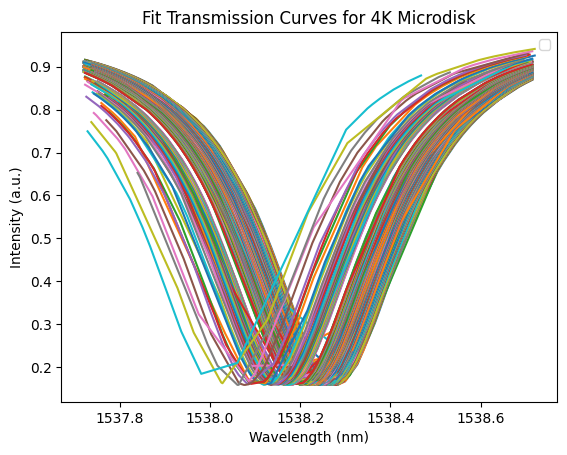

In [94]:
#so this fit looks quite good
# it could use some r variation tho so lets see if we can do that using the neff values as the set point

for i in range(len(fits)):
    plt.plot(fits[i][0], fits[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()


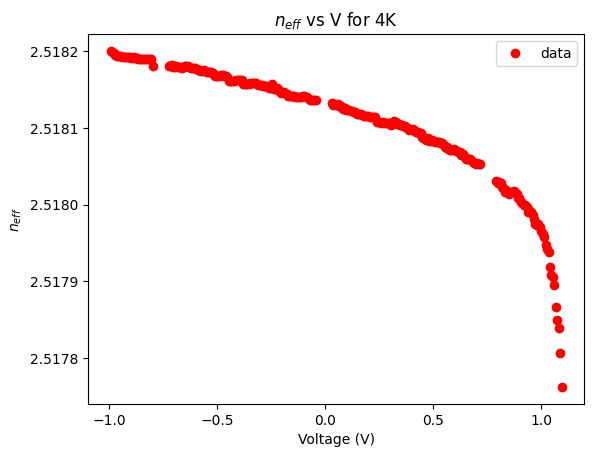

In [95]:

plt.plot(clean_voltages  , neff,  'o', color ='red', label ="data")
plt.title('$n_{eff}$ vs V for 4K')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$n_{eff}$')
#plt.savefig("Gehl-4K-Neff.png",bbox_inches='tight')
plt.legend()
plt.show()

In [96]:
# now lets try again with r

fits_alph = []
j = 0

alph = np.zeros((len(clean_voltages)))
alph_guess = 1735

for n in range(0, length):
    
    def Guess(wavelength,alph_guess):
        return Tsymthru(wavelength, neff[n], 0.9959, alph_guess,   1.75e-6)

    line = []
    line.append(clean_data[n][0])

    x = np.ma.masked_array(clean_data[n][0])
    y = np.ma.masked_array(clean_data[n][1])
    
    fit_params_arr=np.zeros([len(y)+1,1])
    #fit_params_arr[0]=[neff[n], alph[n]]
    fit_params_arr[0]=[alph_guess]
    
    if clean_voltages.mask[n] == False:
        print("Guess is ", fit_params_arr[0])
        for i in range(len(y)):
            fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i])
            fit_params_arr[i+1]=fit_params_arr[i]
        fit_params_arr=fit_params_arr[:-1]

        alph_guess = fit_params_arr[12][0]
        alph[n] = alph_guess    #grab a number from near the middle
        #alph.append(fit_params_arr[12][1])
        
        print(fit_params_arr[12])
        #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
        fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
        trans = fit_ans.tolist()
        line.append(trans)
        fits_alph.append(line)

    #plt.figure(figsize=(10,6))
    #plt.plot(x, y, 'o', color ='red', label = f'{n}')
    #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
    #plt.xlabel('Wavelength (nm)')
    #plt.ylabel('Transmission')
    #plt.legend()
    #plt.show()
    


Guess is  [1735.]
[1351.69061012]
Guess is  [1351.69061012]
[1466.86555505]
Guess is  [1466.86555505]
[1398.68635095]
Guess is  [1398.68635095]
[1459.85329053]
Guess is  [1459.85329053]
[1478.27173815]
Guess is  [1478.27173815]
[1453.41119786]
Guess is  [1453.41119786]
[1429.01997741]
Guess is  [1429.01997741]
[1457.38693497]
Guess is  [1457.38693497]


C:\Users\madel\AppData\Local\Temp\ipykernel_152388\579435365.py:5: RuntimeWarning: divide by zero encountered in divide
  phase=4*math.pi**2*radius*neff/wavelength


[1447.16892825]
Guess is  [1447.16892825]
[1453.92083245]
Guess is  [1453.92083245]
[1453.92083245]
Guess is  [1453.92083245]
[1445.7401622]
Guess is  [1445.7401622]
[1454.98143131]
Guess is  [1454.98143131]
[1455.23242726]
Guess is  [1455.23242726]
[1435.0475668]
Guess is  [1435.0475668]
[1421.08325288]
Guess is  [1421.08325288]
[1407.43525708]
Guess is  [1407.43525708]
[1426.7054256]
Guess is  [1426.7054256]
[1421.69044622]
Guess is  [1421.69044622]
[1402.69382118]
Guess is  [1402.69382118]
[1391.08811885]
Guess is  [1391.08811885]
[1391.08811885]
Guess is  [1391.08811885]
[1391.08811885]
Guess is  [1391.08811885]
[1402.9789393]
Guess is  [1402.9789393]
[1434.96971617]
Guess is  [1434.96971617]
[1441.1970708]
Guess is  [1441.1970708]
[1443.60529139]
Guess is  [1443.60529139]
[1450.49952758]
Guess is  [1450.49952758]
[1450.49952758]
Guess is  [1450.49952758]
[1424.58739736]
Guess is  [1424.58739736]
[1419.30921989]
Guess is  [1419.30921989]
[1435.68964153]
Guess is  [1435.68964153]
[1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


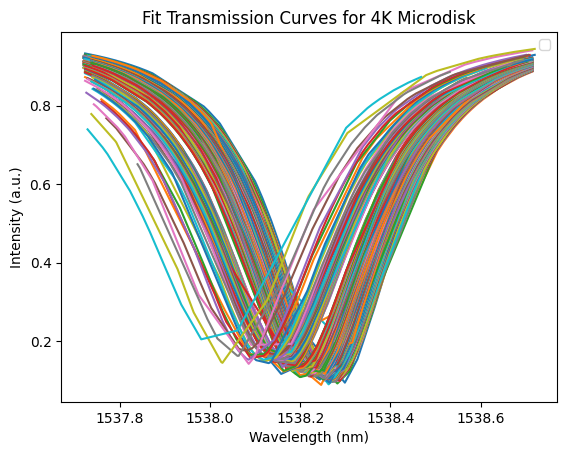

In [97]:

for i in range(len(fits_alph)):
    plt.plot(fits_alph[i][0], fits_alph[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
plt.legend()
plt.title("Fit Transmission Curves for 4K Microdisk")
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
#plt.savefig("Gehl-4K-Curves.png")
plt.show()

In [98]:
# # now lets try again with r

# fits_r = []

# r = np.zeros((len(clean_voltages)))
# r_guess =  0.9959

# for n in range(0, length):
    
#     def Guess(wavelength,r):
#         return Tsymthru(wavelength, neff[n], r, 1735,   1.75e-6)

#     line = []
#     line.append(clean_data[n][0])

#     x = np.ma.masked_array(clean_data[n][0])
#     y = np.ma.masked_array(clean_data[n][1])
    
#     fit_params_arr=np.zeros([len(y)+1,1])
#     #fit_params_arr[0]=[neff[n], r[n]]
#     fit_params_arr[0]=[r_guess]
    
#     if clean_voltages.mask[n] == False:
#         print("Guess is ", fit_params_arr[0])
#         for i in range(len(y)):
#             fit_params_arr[i],fit_cov_arr=curve_fit(Guess,x[~x.mask]*1e-9, y[~y.mask],p0=fit_params_arr[i]) #, bounds=((720,760)))
#             fit_params_arr[i+1]=fit_params_arr[i]
#         fit_params_arr=fit_params_arr[:-1]

#         r_guess = fit_params_arr[12][0]
#         r[n] = r_guess    #grab a number from near the middle
#         #r.append(fit_params_arr[12][1])
        
#         print(fit_params_arr[12])
#         #fit_ans = Guess(x*1e-9,fit_params_arr[:,0], fit_params_arr[:,1])
#         fit_ans = Guess(x*1e-9,fit_params_arr[:,0])
#         trans = fit_ans.tolist()
#         line.append(trans)
#         fits_r.append(line)

#     #plt.figure(figsize=(10,6))
#     #plt.plot(x, y, 'o', color ='red', label = f'{n}')
#     #plt.plot(x, fit_ans, '--', color ='blue', label ="fit")
#     #plt.xlabel('Wavelength (nm)')
#     #plt.ylabel('Transmission')
#     #plt.legend()
#     #plt.show()
    


So for some reason if the r about = to 1 and alpha is way off, the fit is great, but if they're both around 1, the fit is horrid. let's see if we can use this to our advantage

In [99]:
# for i in range(len(fits_r)):
#     plt.plot(fits_r[i][0], fits_r[i][1])  #if needed , label = .3f'$\\alpha = {voltages[i]}$'
# plt.legend()
# plt.title("Fit Transmission Curves for 4K Microdisk")
# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity (a.u.)')
# #plt.savefig("Gehl-4K-Curves.png")
# plt.show()

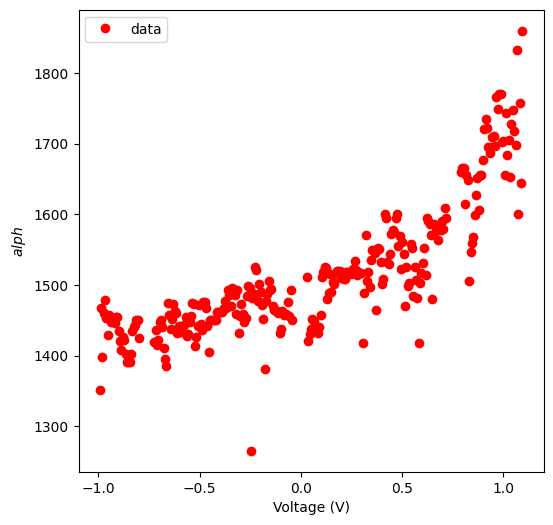

In [100]:
plt.figure(figsize=(6,6))
plt.plot(clean_voltages  , alph,  'o', color ='red', label ="data")
#plt.title('Cryogenic Forward Bias Curve')
#plt.ticklabel_format(useOffset=False)
#plt.text(1551.55, 0.2, r'0.8V', color = "red", fontsize="24")
plt.xlabel('Voltage (V)')
plt.ylabel('$alph$')

plt.legend()
plt.show()